<a href="https://colab.research.google.com/github/Khiet-ht/Bai_Tap_AI/blob/main/W4_25_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=5874e3169cf48f91f493a18e26e3cfe82b3311479969869f4cea2680fd2f3dd7
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


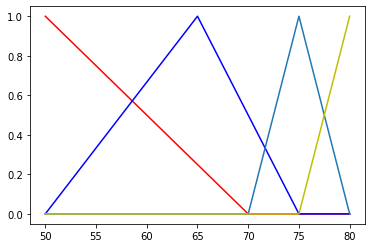

In [9]:
import numpy as np
import skfuzzy as fuzz 
import matplotlib.pyplot as plt

x= np.arange(50,81,1)
slow = fuzz.trimf(x,[50,50,70])
medium = fuzz.trimf(x,[50,65,75])
medium_fast = fuzz.trimf(x,[70,75,80])
full_speed = fuzz.trimf(x,[75,80,80])

plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'b',linewidth=1.5,label='medium')
plt.plot(x,medium_fast,linewidth=1.5,label='medium_fast')
plt.plot(x,full_speed,'y',linewidth=1.5,label='full_speed')

26.666666666666657


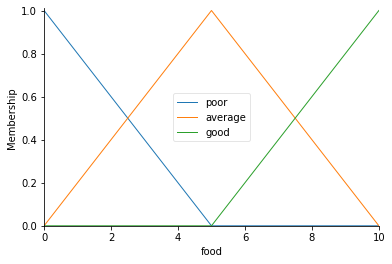

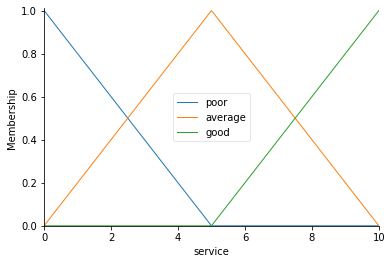

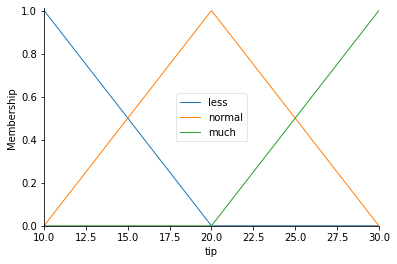

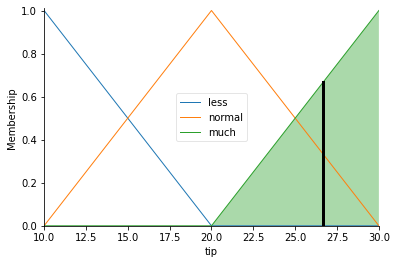

In [41]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor']= fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])
service['poor']= fuzz.trimf(service.universe,[0,0,5])
service['average']= fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])
tip['less']= fuzz.trimf(tip.universe,[0,10,20])
tip['normal']=fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,30,30])


food.view()
service.view()
tip.view()


rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['average']&service['poor'],tip['less'])
rule3 = ctrl.Rule(food['good']&service['poor'],tip['less'])
rule4 = ctrl.Rule(food['poor']&service['average'],tip['less'])
rule5 = ctrl.Rule(food['average']&service['average'],tip['normal'])
rule6 = ctrl.Rule(food['good']&service['average'],tip['much'])
rule7 = ctrl.Rule(food['poor']&service['good'],tip['normal'])
rule8 = ctrl.Rule(food['average']&service['good'],tip['much'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])


#dsfasfsaf
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']= 10
tipping.input['service']= 5
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)
